<img src="./logo_UNSAM.jpg" align="right" width="150" />  

#### Análisis y Porcesamiento de Señales

# Trabajo Práctico Nº5
#### Catalina Re


A partir de tres tipos de señales:
- Electrocardiograma (ECG): estudio que detecta señales eléctricas generados por le corazón, que luego se amplifican y se representan gráficamente como ondas que reflejan cada latido y fase del ciclo cardíaco.
- Pletismografía (PPG): técnica no invasiva que mide los cambios en el volumen sanguíneo en los tejidos y vasos sanguíneos.
- Audio.

Se realizó una estimación de la densidad espectral de potencia (PSD) de cada señal a partir del método Welch. Luego, se realizó una estimación del ancho de banda de cada señal. 

Se cumple Parseval: Valor 1: 342.81533310056045, Valor 2: 342.81533310056045.
Se cumple Parseval: Valor 1: 7.853420892657701, Valor 2: 7.853420892657703.
Se cumple Parseval: Valor 1: 2.713959153720459e-07, Valor 2: 2.71395915372046e-07.


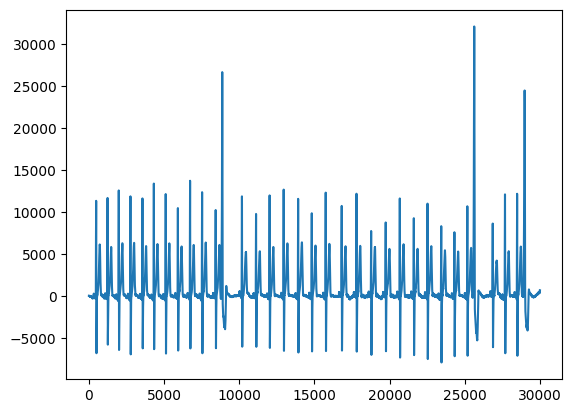

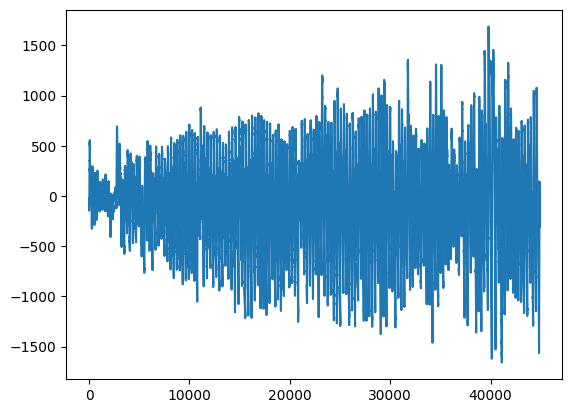

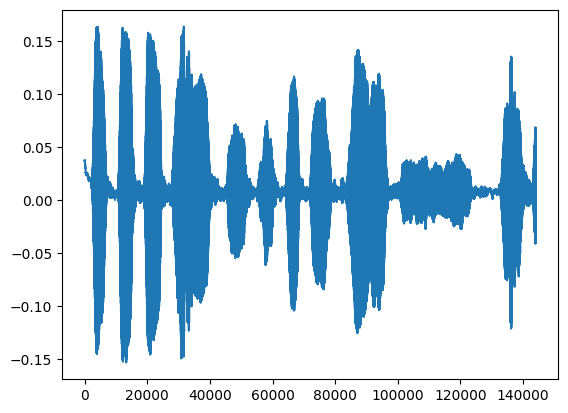

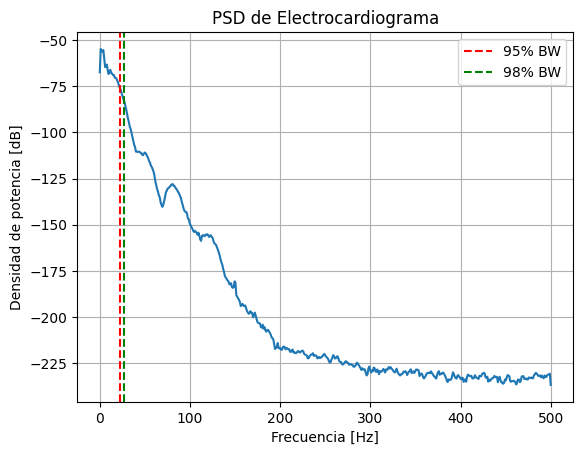

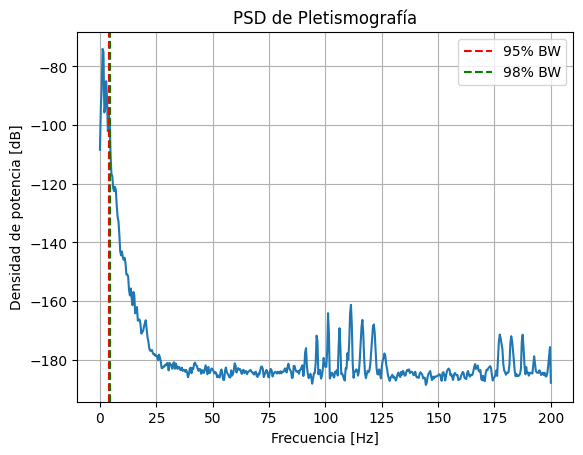

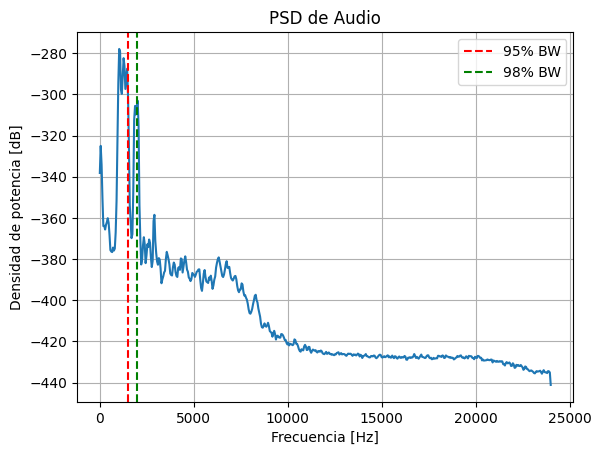

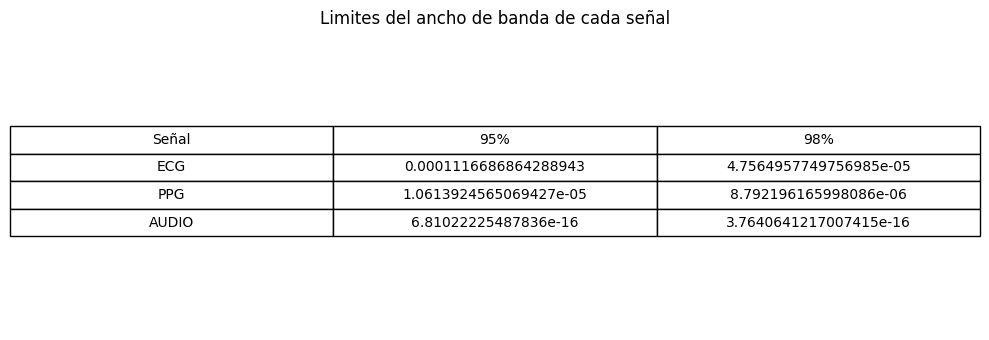

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  8 18:14:10 2025

@author: Catalina Re
"""
# Tres tipos de señales:
# - ELECTROCARDIOGRAMA (ECG)
# - PLETISMOGRAFÍA (PPG)
# - AUDIO

#1. Realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante
#   alguno de los métodos vistos en clase (Periodograma ventaneado, Welch, Blackman-Tukey)
#   UTILIZO BLACKMAN-TUKEY
#2. Realice una estimación del ancho de banda de cada señal y presente los resultados en una tabla para facilitar la comparación

# !! no hacer normalización de potencia --> normalizar al máximo del espectro
# !! verificar Parceval

#%% Definiciones

import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io.wavfile import read

def vertical_flaten (a):
    return a.reshape(a.shape[0], 1)

#%% Lecturas

# LECTURA DEL ECG
fs_ecg = 1000 #Hz

#ecg con ruido 

#para listar las variables que hay en el archivo
# io.whosmat('ECG_TP4.mat')
# mat_struct = sio.loadmat('./ECG_TP4.mat')

# ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
# N = len(ecg_one_lead)

# hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])
# hb_2 = vertical_flaten(mat_struct['heartbeat_pattern2'])

# plt.figure()
# plt.plot(ecg_one_lead[5000:12000])

# plt.figure()
# plt.plot(hb_1)

# plt.figure()
# plt.plot(hb_2)

#ecg sin ruido
ecg_one_lead = np.load('ecg_sin_ruido.npy')

plt.figure()
plt.plot(ecg_one_lead)

#LECTURA DE PPG
fs_ppg = 400 #Hz

#cargar archivo CSV como un array de NumPy
#ppg = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1) #omitir la cabecera si existe

#ppg sin ruido
ppg = np.load('ppg_sin_ruido.npy')

plt.figure()
plt.plot(ppg)

#LECTURA DE AUDIO
#cargar archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
#fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')
#fs_audio, wav_data = sio.wavfile.read('silbido.wav')

plt.figure()
plt.plot(wav_data)

#%% Análisis

#Análisis ECG

#Se cumple Parseval?
#normalizar por el maximo
ecg_n = ecg_one_lead / np.argmax(ecg_one_lead)

ft_ecg = np.fft.fft(ecg_n)
ft_ECG = np.abs(ft_ecg)**2 
ECG_valor1 = np.mean(ft_ECG)
ECG_valor2 = np.sum(ecg_n**2)

print("Se cumple Parseval: Valor 1: {}, Valor 2: {}.".format(ECG_valor1, ECG_valor2))

f_ecg, P_den_ecg = sig.welch(ecg_n, fs_ecg, nperseg=1024)

#Análisis PPG

#Se cumple Parseval?
#normalizar por el maximo
ppg_n = ppg / np.argmax(ppg)

ft_ppg = np.fft.fft(ppg_n)
ft_PPG = np.abs(ft_ppg)**2 
PPG_valor1 = np.mean(ft_PPG)
PPG_valor2 = np.sum(ppg_n**2)

print("Se cumple Parseval: Valor 1: {}, Valor 2: {}.".format(PPG_valor1, PPG_valor2))

f_ppg, P_den_ppg = sig.welch(ppg_n, fs_ppg, nperseg=1024)

#Análisis  AUDIO

#Se cumple Parseval?
#normalizar por el maximo
audio_n = wav_data / np.argmax(wav_data)

ft_audio = np.fft.fft(audio_n)
ft_AUDIO = np.abs(ft_audio)**2 
AUDIO_valor1 = np.mean(ft_AUDIO)
AUDIO_valor2 = np.sum(audio_n**2)

print("Se cumple Parseval: Valor 1: {}, Valor 2: {}.".format(AUDIO_valor1, AUDIO_valor2))

f_audio, P_den_audio = sig.welch(audio_n, fs_audio, nperseg=1024)

#%% Ancho de banda

#ECG

#potencia total (integral)
ECG_pot_total = np.sum(P_den_ecg)

#potencia acumulada (desde 0Hz hacia adelante)
ECG_pot_acumulada = np.cumsum(P_den_ecg) 

#frecuencias donde se alcanzan los 95% y 98%
ECG_frec_95 = 0.95 * ECG_pot_total
ECG_frec_98 = 0.98 * ECG_pot_total

#índice dónde se encuentran esas frecuencias
ECG_i_95 = np.where(ECG_pot_acumulada >= ECG_frec_95)[0][0]
ECG_i_98 = np.where(ECG_pot_acumulada >= ECG_frec_98)[0][0]

#ancho de banda
ECG_bw_95 = P_den_ecg[ECG_i_95] 
ECG_bw_98 = P_den_ecg[ECG_i_98]

#PPG

#potencia total (integral)
PPG_pot_total = np.sum(P_den_ppg)

#potencia acumulada (desde 0Hz hacia adelante)
PPG_pot_acumulada = np.cumsum(P_den_ppg) 

#frecuencias donde se alcanzan los 95% y 98%
PPG_frec_95 = 0.95 * PPG_pot_total
PPG_frec_98 = 0.98 * PPG_pot_total

#índice dónde se encuentran esas frecuencias
PPG_i_95 = np.where(PPG_pot_acumulada >= PPG_frec_95)[0][0]
PPG_i_98 = np.where(PPG_pot_acumulada >= PPG_frec_98)[0][0]

#ancho de banda
PPG_bw_95 = P_den_ppg[PPG_i_95] 
PPG_bw_98 = P_den_ppg[PPG_i_98]

#AUDIO

#potencia total (integral)
au_pot_total = np.sum(P_den_audio)

#potencia acumulada (desde 0Hz hacia adelante)
au_pot_acumulada = np.cumsum(P_den_audio)

#frecuencias donde se alcanzan los 95% y 98%
au_frec_95 = 0.95 * au_pot_total
au_frec_98 = 0.98 * au_pot_total

#índice dónde se encuentran esas frecuencias
au_i_95 = np.where(au_pot_acumulada >= au_frec_95)[0][0]
au_i_98 = np.where(au_pot_acumulada >= au_frec_98)[0][0]

#ancho de banda
au_bw_95 = P_den_audio[au_i_95] 
au_bw_98 = P_den_audio[au_i_98]

#%% Gráficos y Resultados

#ECG

plt.figure()
bfrec1=f_ecg<=fs_ecg/2 
plt.plot(f_ecg[bfrec1], 10*np.log10(2*np.abs(P_den_ecg[bfrec1])**2))
plt.axvline(f_ecg[ECG_i_95], color='r', linestyle='--', label='95% BW')
plt.axvline(f_ecg[ECG_i_98], color='g', linestyle='--', label='98% BW')
plt.title('PSD de Electrocardiograma')
plt.ylabel('Densidad de potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.legend()

#PPG

plt.figure()
bfrec2=f_ppg<=fs_ppg/2 
plt.plot(f_ppg[bfrec2], 10*np.log10(2*np.abs(P_den_ppg[bfrec2])**2))
plt.axvline(f_ppg[PPG_i_95], color='r', linestyle='--', label='95% BW')
plt.axvline(f_ppg[PPG_i_98], color='g', linestyle='--', label='98% BW')
plt.title('PSD de Pletismografía')
plt.ylabel('Densidad de potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.legend()

#AUDIO

plt.figure()
bfrec3=f_audio<=fs_audio/2 
plt.plot(f_audio[bfrec3], 10*np.log10(2*np.abs(P_den_audio[bfrec3])**2))
plt.axvline(f_audio[au_i_95], color='r', linestyle='--', label='95% BW')
plt.axvline(f_audio[au_i_98], color='g', linestyle='--', label='98% BW')
plt.title('PSD de Audio')
plt.ylabel('Densidad de potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.legend()

#tabla
señal=['ECG', 'PPG', 'AUDIO']
datos_95=[ECG_bw_95, PPG_bw_95, au_bw_95]
datos_98=[ECG_bw_98, PPG_bw_98, au_bw_98]

tabla=[]
for i in range(len(señal)):
    fila= [
        señal[i],
        datos_95[i],
        datos_98[i]
    ]
    tabla.append(fila)
    
#mostrar tabla
fig, ax=plt.subplots(figsize=(10,2+len(tabla)*0.5))
ax.axis('off')
tabla2=ax.table(
    cellText=tabla,
    colLabels=['Señal', '95%', '98%'],
    loc='center',
    cellLoc='center',
    colLoc='center'
    )
tabla2.auto_set_font_size(False)
tabla2.set_fontsize(10)
tabla2.scale(1,1.5)

plt.title('Limites del ancho de banda de cada señal')
plt.tight_layout()
plt.show()

Haber estimado la densidad espectral de potencia permite visualizar en qué frecuencias se concentra la potencia de una señal.
El ancho de banda al 95% y 98% permite cuantificar el rango de frecuencias en el que se encuentra la mayor parte de la energía de la señal. 
El método de Welch como estimador divide la eñal en segmentos solapados, aplica ventanas para reducir el desparramo espectral y promedia las PSDs reduciendo la varianza de la estimación.
La verificación de Parseval sirvió para confirmar que la energía en el tiempo y en la frecuencia coinciden, esto comprueba que el proceso de normalización fue correcto. 
La tabla final permite ver que el ECG tiene un ancho de banda muy acotado (frecuencias bajas), el PPG también pero su ancho de banda es ligeramente más ancho. Y el audio muestra un espectro más amplio. 

Este trabajo permitió caracterizar cuantitativamente cada señal y compararlas usando herramientas de análisis espectral. Welch resultó ser una buena elecció para obtener espectros suaves y estables, y la estimación del ancho de banda aporta valor práctico, por ejemplo, en diseño de filtros. 